In [1]:
import glob #to read the files
import json #to work if .json
import numpy as np #to math
import pandas as pd #to save the data
import math #to convertion calculus
from astropy.time import Time #to time converting
from astropy import units #time correction
from astropy.coordinates import SkyCoord #time correction
from scipy import interpolate #to interpolate the wavelength and flux
from tabulate import tabulate #to export in table format
from scipy.interpolate import interp1d
#import scipy.optimize as opt
from scipy import optimize
from scipy import signal
import os.path
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, WhiteKernel
from scipy import stats
import os.path 

In [2]:
name = "SN2006bt.json"

In [3]:
with open(name, "r") as read_file:
    data = json.load(read_file)

In [4]:
url = name
if url.endswith('.json'):
    url = url[:-5]

In [5]:
%run ./functions.ipynb

In [6]:
redshift = redshift_value(data[url])

0.032156


In [7]:
file = open("t0_values.txt")
lines = file.readlines()
file.close()

In [8]:
t0_names = []
t0_values = []

In [9]:
for line in lines:
    if line.startswith('#'): continue
    co=line.rstrip().replace('INDEF','Nan').split()

    t0_names.append(co[0])
    t0_values.append(co[1])

In [10]:
if url in t0_names:
    
    idx = t0_names.index(name[:-5])
    t0 = t0_values[idx]
    print("t0 calculado")
    
else:
    
    t0 = max_time(data[url])
    
    print("t0 fornecido")

t0 calculado


In [11]:
max_time(data[url])

53855.0

In [12]:
t0

'53856.6'

In [13]:
float(t0)-max_time(data[url])

1.5999999999985448

In [14]:
units = []

In [15]:
if redshift is not None and t0 is not None:
        
    #spectra data
    i=0
    n=0
    while i < len(data[url]["spectra"]):


        if "time" in data[url]["spectra"][i]:

            spectratime = float(data[url]["spectra"][i]["time"]) - float(t0)
            #print(spectratime)

        alert3 = 0
        #if its the first spectra then previous time is the first time
        if i == 0:
            previoustime = spectratime

        else:
            #if the diference between the time and previous time is more than * days so emmit an alert to continue
            if (spectratime - previoustime) < 2000:

                alert3 = 1
                previoustime = spectratime

            #if the diference of time is less than * continue
        if alert3 == 1:

            #verifing if its calibrated and if it have a redshift correction 
            alert1 = 0 #for calibration
            alert2 = 0 #for redshift correction

            if data[url]["spectra"][i]["u_fluxes"] == "erg/s/cm^2/Angstrom":          
                alert1 = 1 #first alert

                if "deredshifted" in data[url]["spectra"][i]:
                    alert2 = 1 #second alert

            #if its calibrated and corrected
            if alert1 == 1 and alert2 == 1:

                #there are 3 collumns: wavelength flux and flux error 
                if len(data[url]["spectra"][i]["data"][0]) == 3:

                    n = n + 1

                #there are 2 collumns: wavelength and flux
                elif len(data[url]["spectra"][i]["data"][0]) == 2:

                    n = n + 1

            #if its calibrated, redshift not adjusted but with a clear redshift
            elif alert1 ==1 and alert2 == 0:   

                #there are 3 collumns: wavelength flux and flux error 
                if len(data[url]["spectra"][i]["data"][0]) == 3:

                    n = n + 1

                #there are 2 collumns: wavelength and flux
                elif len(data[url]["spectra"][i]["data"][0]) == 2:

                    n = n + 1

        i = i + 1

In [16]:
n

9

In [17]:

#name = sn_names[nn]+".json"

print(name)

with open(name, "r") as read_file:
    data = json.load(read_file)

url = name
if url.endswith('.json'):
    url = url[:-5]

%run ./functions.ipynb

redshift = redshift_value(data[url])

file = open("t0_values.txt")
lines = file.readlines()
file.close()

t0_names = []
t0_values = []

for line in lines:
    if line.startswith('#'): continue
    co=line.rstrip().replace('INDEF','Nan').split()

    t0_names.append(co[0])
    t0_values.append(co[1])

if url in t0_names:

    idx = t0_names.index(name[:-5])
    t0 = t0_values[idx]
    print("t0 calculado")

else:

    t0 = max_time(data[url])

    print("t0 fornecido")

#t0 = max_time(data[url])

#max_time(data[url])

#t0

print(float(t0)-max_time(data[url]))

units = []

if redshift is not None and t0 is not None:

    #spectra data
    i=0
    n=0
    while i < len(data[url]["spectra"]):


        if "time" in data[url]["spectra"][i]:

            spectratime = float(data[url]["spectra"][i]["time"]) - float(t0)
            #print(spectratime)

        alert3 = 0
        #if its the first spectra then previous time is the first time
        if i == 0:
            previoustime = spectratime

        else:
            #if the diference between the time and previous time is more than * days so emmit an alert to continue
            if (spectratime - previoustime) < 2000:

                alert3 = 1
                previoustime = spectratime

            #if the diference of time is less than * continue
        if alert3 == 1:

            #verifing if its calibrated and if it have a redshift correction 
            alert1 = 0 #for calibration
            alert2 = 0 #for redshift correction

            if data[url]["spectra"][i]["u_fluxes"] == "erg/s/cm^2/Angstrom":          
                alert1 = 1 #first alert

                if "deredshifted" in data[url]["spectra"][i]:
                    alert2 = 1 #second alert

            #if its calibrated and corrected
            if alert1 == 1 and alert2 == 1:

                #there are 3 collumns: wavelength flux and flux error 
                if len(data[url]["spectra"][i]["data"][0]) == 3:

                    n = n + 1

                #there are 2 collumns: wavelength and flux
                elif len(data[url]["spectra"][i]["data"][0]) == 2:

                    n = n + 1

            #if its calibrated, redshift not adjusted but with a clear redshift
            elif alert1 ==1 and alert2 == 0:   

                #there are 3 collumns: wavelength flux and flux error 
                if len(data[url]["spectra"][i]["data"][0]) == 3:

                    n = n + 1

                #there are 2 collumns: wavelength and flux
                elif len(data[url]["spectra"][i]["data"][0]) == 2:

                    n = n + 1

        i = i + 1



final_gradex = np.linspace(-20, 50, 71)
final_gradey = np.linspace(2000, 9200, 721)

x = []
y = []
x_ori = []
y_ori = []
times = []

if n > 4:

    #print(redshift)
    spectra_data = 0
    i=0

    while i < len(data[url]["spectra"]):

        if "time" in data[url]["spectra"][i]:

            spectratime = (float(data[url]["spectra"][i]["time"]) - float(t0))/(1+redshift)
            #print(spectratime)
            #verifing if its calibrated and if it have a redshift correction 
            alert1 = 0 #for calibration
            alert2 = 0 #for redshift correction

            if data[url]["spectra"][i]["u_fluxes"] == "erg/s/cm^2/Angstrom":          
                alert1 = 1 #first alert

                if "deredshifted" in data[url]["spectra"][i]:
                    alert2 = 1 #second alert

            #if its calibrated and corrected
            if alert1 == 1 and alert2 == 1:
                #print("ok")
                #there are 3 collumns: wavelength flux and flux error
                if len(data[url]["spectra"][i]["data"][0]) == 3:

                    df = pd.DataFrame(data[url]["spectra"][i]["data"], columns=['wavelength', 'flux', 'fluxerror'])

                    #converting to float
                    df['wavelength'] = df['wavelength'].astype(float)
                    df['flux'] = df['flux'].astype(float)


                    #sort the data by wavelength
                    df = df.sort_values(by=['wavelength'])
                    df = df.reset_index(drop=True)

                    #to kill negative fluxes
                    fluxtemp = []
                    for var in range(0,len(df['flux'])):
                        if (df['flux'][var] > 0):
                            fluxtemp.append(df['flux'][var])
                        else:
                            fluxtemp.append(0)                                 
                            
                    fun = interp1d(df['wavelength'], fluxtemp, kind='cubic')        
                            
                    gridtemp = np.linspace(math.ceil(min(df['wavelength'])), math.ceil(max(df['wavelength']))-1, math.ceil(max(df['wavelength']))-1 - math.ceil(min(df['wavelength']))+1)
                    
                    #frequencia da amostra
                    fs = 1/(gridtemp[1]-gridtemp[0])
                            
                    interpflux = fun(gridtemp)        
                            

                    #making a list of lists 
                    suavf = suavization(interpflux, fs)
                    
                    #if "observer" in data[url]["spectra"][i]:

                    #if data[url]["spectra"][i]["observer"] == "Zhang, Jujia":

                    
                    for h in range(0,len(suavf)):
                        
                        suavf[h] = suavf[h]*10**15
                        
                    for h in range(0,len(fluxtemp)):
                        
                        fluxtemp[h] = fluxtemp[h]*10**15
                    
                    
                    x.append(gridtemp)
                    y.append(suavf)
                    times.append(spectratime)
                    
                    x_ori.append(df['wavelength'])
                    y_ori.append(fluxtemp)

                    units.append(data[url]["spectra"][i]["u_fluxes"]) 


                #there are 2 collumns: wavelength and flux
                if len(data[url]["spectra"][i]["data"][0]) == 2:

                    df = pd.DataFrame(data[url]["spectra"][i]["data"], columns=['wavelength', 'flux'])

                    #converting to float
                    df['wavelength'] = df['wavelength'].astype(float)
                    df['flux'] = df['flux'].astype(float)


                    #sort the data by wavelength
                    df = df.sort_values(by=['wavelength'])
                    df = df.reset_index(drop=True)

                    #to kill negative fluxes
                    fluxtemp = []
                    for var in range(0,len(df['flux'])):
                        if (df['flux'][var] > 0):
                            fluxtemp.append(df['flux'][var])
                        else:
                            fluxtemp.append(0)            

                            
                    fun = interp1d(df['wavelength'], fluxtemp, kind='cubic')        
                            
                    gridtemp = np.linspace(math.ceil(min(df['wavelength'])), math.ceil(max(df['wavelength']))-1, math.ceil(max(df['wavelength']))-1 - math.ceil(min(df['wavelength']))+1)
                    
                    #frequencia da amostra
                    fs = 1/(gridtemp[1]-gridtemp[0])
                            
                    interpflux = fun(gridtemp)        
                            

                    #making a list of lists 
                    suavf = suavization(interpflux, fs)

                    #if "observer" in data[url]["spectra"][i]:

                    #if data[url]["spectra"][i]["observer"] == "Zhang, Jujia":

                    
                    for h in range(0,len(suavf)):
                        
                        suavf[h] = suavf[h]*10**15
                        
                    for h in range(0,len(fluxtemp)):
                        
                        fluxtemp[h] = fluxtemp[h]*10**15
                    
                    
                    x.append(gridtemp)
                    y.append(suavf)
                    times.append(spectratime)
                    
                    x_ori.append(df['wavelength'])
                    y_ori.append(fluxtemp)

                    units.append(data[url]["spectra"][i]["u_fluxes"]) 
                        
            #if its calibrated, redshift not adjusted but with a clear redshift

            if alert1 ==1 and alert2 == 0:  

                #there are 3 collumns: wavelength flux and flux error 
                if len(data[url]["spectra"][i]["data"][0]) == 3:

                    df = pd.DataFrame(data[url]["spectra"][i]["data"], columns=['wavelength', 'flux', 'fluxerror'])

                    #converting to float
                    df['wavelength'] = df['wavelength'].astype(float)
                    df['flux'] = df['flux'].astype(float)


                    #sort the data by wavelength
                    df = df.sort_values(by=['wavelength'])
                    df = df.reset_index(drop=True)

                    #to kill negative fluxes
                    fluxtemp = []
                    for var in range(0,len(df['flux'])):
                        if (df['flux'][var] > 0):
                            fluxtemp.append(df['flux'][var])
                        else:
                            fluxtemp.append(0)


                    #redshift correction
                    fluxtemp = [x * (((1+redshift))**3) for x in fluxtemp] #for the flux           
                    df['wavelength'] = [x * (1/(1+redshift)) for x in df['wavelength']] #for the wavelength
                    #spectratime = spectratime/(1+redshift) #for time

                    #making a list of lists 
                            
                    fun = interp1d(df['wavelength'], fluxtemp, kind='cubic')        
                            
                    gridtemp = np.linspace(math.ceil(min(df['wavelength'])), math.ceil(max(df['wavelength']))-1, math.ceil(max(df['wavelength']))-1 - math.ceil(min(df['wavelength']))+1)
                    
                    #frequencia da amostra
                    fs = 1/(gridtemp[1]-gridtemp[0])
                            
                    interpflux = fun(gridtemp)        
                            

                    #making a list of lists 
                    suavf = suavization(interpflux, fs)

                    #if "observer" in data[url]["spectra"][i]:

                    #if data[url]["spectra"][i]["observer"] == "Zhang, Jujia":

                    
                    for h in range(0,len(suavf)):
                        
                        suavf[h] = suavf[h]*10**15
                        
                    for h in range(0,len(fluxtemp)):
                        
                        fluxtemp[h] = fluxtemp[h]*10**15
                    
                    
                    x.append(gridtemp)
                    y.append(suavf)
                    times.append(spectratime)
                    
                    x_ori.append(df['wavelength'])
                    y_ori.append(fluxtemp)

                    units.append(data[url]["spectra"][i]["u_fluxes"]) 
                    
                    
                #there are 2 collumns: wavelength flux and flux error 
                if len(data[url]["spectra"][i]["data"][0]) == 2:

                    df = pd.DataFrame(data[url]["spectra"][i]["data"], columns=['wavelength', 'flux'])

                    #converting to float
                    df['wavelength'] = df['wavelength'].astype(float)
                    df['flux'] = df['flux'].astype(float)


                    #sort the data by wavelength
                    df = df.sort_values(by=['wavelength'])
                    df = df.reset_index(drop=True)

                    #to kill negative fluxes
                    fluxtemp = []
                    for var in range(0,len(df['flux'])):
                        if (df['flux'][var] > 0):
                            fluxtemp.append(df['flux'][var])
                        else:
                            fluxtemp.append(0)

                    #redshift correction
                    fluxtemp = [x * (((1+redshift))**3) for x in fluxtemp] #for the flux           
                    df['wavelength'] = [x * (1/(1+redshift)) for x in df['wavelength']] #for the wavelength
                    #spectratime = spectratime/(1+redshift) #for time

                            
                    fun = interp1d(df['wavelength'], fluxtemp, kind='cubic')        
                            
                    gridtemp = np.linspace(math.ceil(min(df['wavelength'])), math.ceil(max(df['wavelength']))-1, math.ceil(max(df['wavelength']))-1 - math.ceil(min(df['wavelength']))+1)
                    
                    #frequencia da amostra
                    fs = 1/(gridtemp[1]-gridtemp[0])
                            
                    interpflux = fun(gridtemp)        
                            

                    #making a list of lists 
                    suavf = suavization(interpflux, fs)
                    #if "observer" in data[url]["spectra"][i]:

                    #if data[url]["spectra"][i]["observer"] == "Zhang, Jujia":

                    
                    for h in range(0,len(suavf)):
                        
                        suavf[h] = suavf[h]*10**15
                        
                    for h in range(0,len(fluxtemp)):
                        
                        fluxtemp[h] = fluxtemp[h]*10**15
                    
                    
                    x.append(gridtemp)
                    y.append(suavf)
                    times.append(spectratime)
                    
                    x_ori.append(df['wavelength'])
                    y_ori.append(fluxtemp)

                    units.append(data[url]["spectra"][i]["u_fluxes"]) 
        i = i + 1






SN2006bt.json
0.032156
t0 calculado
1.5999999999985448


In [18]:
p = 8

In [19]:
fun_filter = interp1d(x[p], y[p], kind='cubic')

In [20]:
x[0]

array([3378., 3379., 3380., ..., 7175., 7176., 7177.])

In [21]:
dif_x = []
dif_y = []

In [22]:
for i in range(0, len(x_ori[p])):
    
    #print(x_ori[0][i])
    if min(x[p]) < x_ori[p][i] < max(x[p]):
        
        dif_y.append((fun_filter(x_ori[p][i]) - y_ori[p][i])/fun_filter(x_ori[p][i]))
        dif_x.append(x_ori[p][i])

<IPython.core.display.Javascript object>


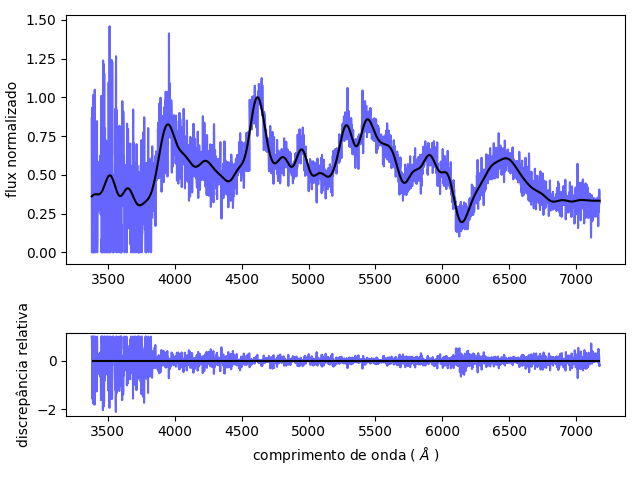

In [23]:
%matplotlib notebook
figure, axes = plt.subplots(2, 1, gridspec_kw={'height_ratios': [3, 1]})


#figure.suptitle("Main Title \n dfas")
#plt.subplot(2, 1)

axes[0].plot(x_ori[p], y_ori[p]/max(y[p]), 'b', alpha = 0.6)
axes[0].plot(x[p], y[p]/max(y[p]), 'k')
#axes[0].set_xlabel("comprimento de onda")
axes[0].set_ylabel("flux normalizado")
#axes[0].text(6000, 0.8, r'Tempo: '+str("{0:.2f}".format(round(times[p],2))), fontsize=15)


axes[1].hlines(y=0, xmin = min(dif_x), xmax = max(dif_x), color='k', zorder = 10)
axes[1].plot(dif_x, dif_y, 'b', alpha = 0.6)
axes[1].set_xlabel("comprimento de onda ( $\AA$ )")
axes[1].set_ylabel("discrepância relativa")

plt.tight_layout()

figure.savefig(str(url) + str(times[p]) + '.png', format='png', dpi=600)

plt.show()

In [24]:
times

[-2.1217722902304033,
 -0.2034576168710223,
 0.7072574300815007,
 1.6761032247094445,
 2.6643259352268456,
 3.555664066282862,
 5.522421029383509,
 6.500955281952657,
 17.129193649022326]

In [25]:
dif_y

[1.0,
 1.0,
 0.4298384114431251,
 -1.558917915493699,
 -0.4622436300266365,
 1.0,
 0.4779318813679963,
 -1.7469532011139097,
 -0.1411806774434974,
 1.0,
 0.8330943369534124,
 0.5138263515665907,
 1.0,
 -0.8946431419568494,
 -1.0264903464723156,
 -1.803929983937669,
 -0.561135234625739,
 -0.21484212154598822,
 1.0,
 1.0,
 0.4497707242754414,
 -1.1244886636237759,
 -0.5600664595661787,
 -0.257006258673551,
 -0.726047021240766,
 -0.011374213619488448,
 -0.7695468125957425,
 -1.260942611593,
 1.0,
 0.7845656723906572,
 -0.5643863250264821,
 -0.5628414308304659,
 0.2940240085536478,
 0.09719407179981362,
 0.006588331289179437,
 0.036263481398762586,
 0.06608384020078398,
 0.09605036339614963,
 0.1261612664610034,
 0.15641148828144527,
 0.18679295747630745,
 0.21729456928782845,
 0.24790248246748456,
 0.27859999125175167,
 0.2804439798218121,
 -0.641435144317848,
 0.3559191355191074,
 -0.22122743918572416,
 -0.9034821371820616,
 -1.615402212831498,
 1.0,
 1.0,
 0.7826665717174079,
 0.7898322